In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from plotting import COLOR_Y2H

yeri = pd.read_csv('../data/internal/YeRI.tsv', sep='\t')
yeri['orf_name_a'] = yeri[['ad_orf_name', 'db_orf_name']].min(axis=1)
yeri['orf_name_b'] = yeri[['ad_orf_name', 'db_orf_name']].max(axis=1)
yeri['pair'] = yeri['orf_name_a'] + '_' + yeri['orf_name_b']
yeri = yeri.loc[yeri['orf_name_a'] != yeri['orf_name_b'], :]
yeri['in_screen_1'] = yeri['in_screen_1'].astype(bool)
yeri['in_screen_2'] = yeri['in_screen_2'].astype(bool)
yeri['in_screen_3'] = yeri['in_screen_3'].astype(bool)

In [2]:
yeri.drop_duplicates('pair').loc[:, ['orf_name_a', 'orf_name_b']].to_csv('../output/YeRI_no-homodimers.tsv', sep='\t')

In [3]:
# the ipython matplotlib inline display overrides the rcParams
# that used to be called on the pyplot import but now seems like
# it's called on the first use of inline figures or something 
# problem is in ipython: https://github.com/ipython/ipython/issues/10383
# should be fixed soon: https://github.com/ipython/matplotlib-inline/pull/14
plt.show()
mpl.rcParams['font.size'] = 7.
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['savefig.dpi'] = 500

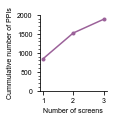

In [4]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(h=1.4, w=1.2)
yeri = yeri.groupby('pair')[['in_screen_1', 'in_screen_2', 'in_screen_3']].any()
ppi_by_screen = [yeri['in_screen_1'].sum(),
                 (yeri['in_screen_1'] | yeri['in_screen_2']).sum(),
                 (yeri['in_screen_1'] | yeri['in_screen_2'] | yeri['in_screen_3']).sum(),
]
ax.plot(range(1, 4), ppi_by_screen, '.-', color=COLOR_Y2H)
ax.set_ylim(0, 2000)
ax.set_xticks([1, 2, 3])
ax.set_yticks(range(0, 2001, 500))
ax.set_yticks(range(0, 2001, 100), minor=True)
ax.set_xlabel('Number of screens')
ax.set_ylabel('Cummulative number of PPIs')
for loc in ['top', 'right']:
    ax.spines[loc].set_visible(False)
fig.savefig('../figures/YeRI_screen-saturation.pdf',
            bbox_inches='tight')